In [1]:
import cv2
from PIL import Image
import numpy as np

WITH STUDENTS


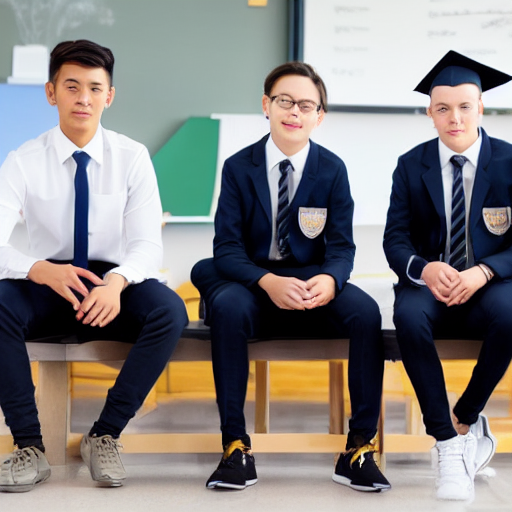

WITHOUT STUDENTS


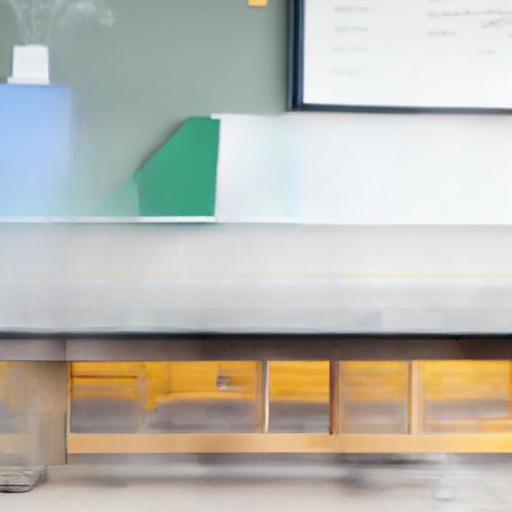

In [2]:
# Load the pictures
with_students = cv2.imread('../images/with_students.png')
without_students = cv2.imread('../images/without_students.png')

# Switch Colourspace
with_students = cv2.cvtColor(with_students, cv2.COLOR_RGB2BGR)
without_students = cv2.cvtColor(without_students, cv2.COLOR_RGB2BGR)

# Confirm two pictures are loaded properly
print("WITH STUDENTS")
display(Image.fromarray(with_students))
print("WITHOUT STUDENTS")
display(Image.fromarray(without_students))

DIFFED IMAGE


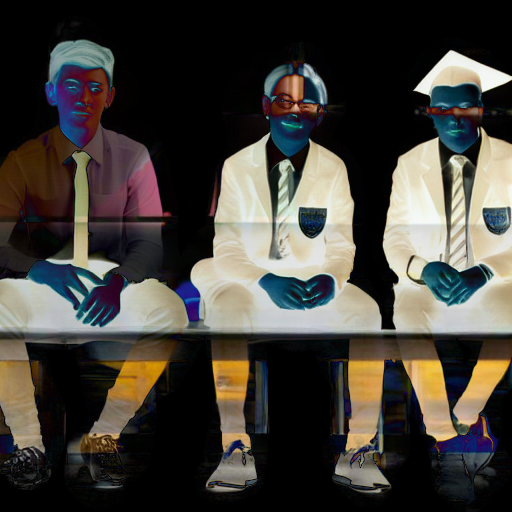

DIFF IMAGE MASK


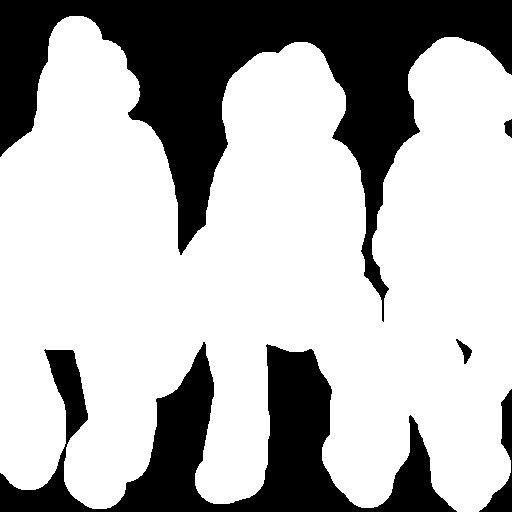

In [3]:
# Create a diffed image
diffed_image = cv2.absdiff(without_students, with_students)
# Display the image
print("DIFFED IMAGE")
display(Image.fromarray(diffed_image))

# Create a mask with the same shape
foreground_mask = np.zeros(diffed_image.shape, dtype='uint8')

# From the values where the pixel is 0
for i, j in zip(*np.nonzero(np.sum(diffed_image, axis=2))):
    foreground_mask[i, j, :] = [255, 255, 255]

# Add a medial filter to clean up the mask
foreground_mask = cv2.medianBlur(foreground_mask, 3)

# Make it binary again
for i, j in zip(*np.nonzero(np.sum(diffed_image, axis=2))):
    foreground_mask[i, j, :] = [255, 255, 255]

# Display the diffmask
print("DIFF IMAGE MASK")
display(Image.fromarray(foreground_mask))

FINAL IMAGE


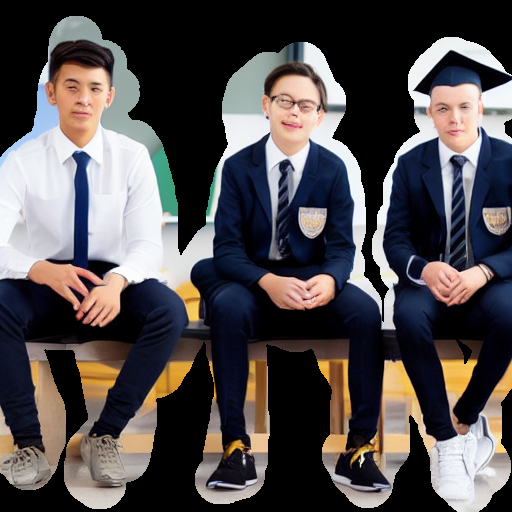

In [4]:
foreground_image = cv2.bitwise_and(with_students, foreground_mask)

# Show the picture
print("FINAL IMAGE")
display(Image.fromarray(foreground_image))

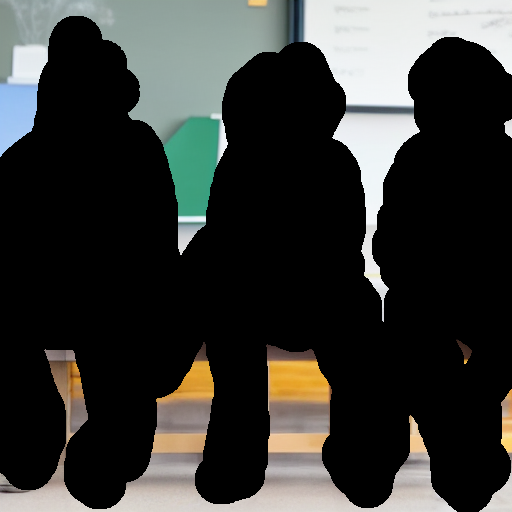

In [5]:
# Invert the diffmask
background_mask = cv2.bitwise_not(foreground_mask)

# Print the diffmask
background_image = cv2.bitwise_and(with_students, background_mask)

# Display the background image
display(Image.fromarray(background_image))